<a href="https://colab.research.google.com/github/revak18/nicotine_use_mathmodel/blob/main/Models_Infection_Recovery_Rates.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Models for Time-Varying Parameters**
*   Beta: Rate of infection
*   Gamma: Rate of recovery
*   Rho: Rate of relapse


---



# **Beta: Rate of infection for e-cigarettes in 'Young Adults' and 'Adults'**

E-cigarettes YoY usage history in Adults used to calculate the rate of infection, Beta

2012–2013: 2.4% of adults aged 25–44 and 2% of adults aged 45–64 used e-cigarettes

2016: 4.2% of adults aged 25–44 and 2.8% of adults aged 45–64 used e-cigarettes

2018: 3.2% of adults used e-cigarettes, down from 3.7% in 2014

2021: 4.5% of adults used e-cigarette

2022: 6% of adults used e-cigarette

**Logistic Function:** The function models the infection rate as a logistic curve with parameters:
𝑟 : Growth rate of infection.
𝐾 : Carrying capacity (maximum infection rate).
𝑡0 : Inflection year where growth starts to stabilize.

**Fitting Process:** The curve_fit function optimizes the parameters (𝑟, 𝐾, 𝑡0) based on historical data.

**beta_realistic:** Converts time in months to years and computes the infection rate using the fitted logistic function. This function is directly usable in your DDE-SIR model.

**Visualization:** A plot shows how the infection rate grows initially and stabilizes over time, matching the CDC data and predicting future trends.

**Output:** The fitted parameters 𝑟, 𝐾, and 𝑡0 are printed for reference and can be manually set if needed.

**How carrying capacity works in the Logistic Model**

**Definition:** 𝐾 is the value at which the infection rate plateaus as time progresses, reflecting the maximum percentage of the population that can realistically be infected under the given conditions.

**Mathematical Role:**
In the logistic function: 𝛽(𝑡) = 𝐾 / 1 + 𝑒^−𝑟(𝑡−𝑡0)

𝐾 is the numerator, ensuring that as 𝑡→∞, 𝛽(𝑡)→𝐾. It defines the ceiling for 𝛽(𝑡).

**Interpretation:** For the infection rate, 𝐾 represents the maximum percentage of people in the population who can adopt nicotine use (e-cigarettes).
It reflects constraints like:
Social factors (e.g., cultural resistance to nicotine use).
Biological factors (e.g., not everyone is susceptible).
Policy and regulation impacts (e.g., bans on marketing).

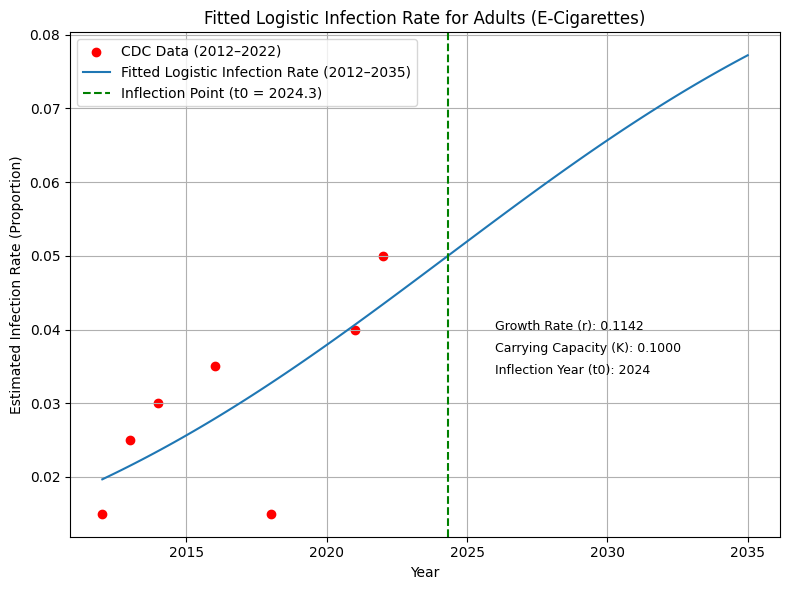

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Use the historical CDC data
years = np.array([2012, 2013, 2014, 2016, 2018, 2021, 2022])  # Time in years
infection_rates = np.array([0.015, 0.025, 0.03, 0.035, 0.015, 0.04, 0.05])  # Proportions

# Logistic function for infection rate
# Args:
#      t: Time in years.
#      r: Growth rate of infection.
#      K: Carrying capacity (maximum infection rate).
#      t0: Inflection year (stabilization starts).
# Returns: beta(t) - Infection rate at time t.
def logistic_function(t, r, K, t0):
    return K / (1 + np.exp(-r * (t - t0)))

# Fit the logistic model to the historical data
# Based on the CDC data, K=0.05 (5%) could represent a realistic maximum for e-cigarette adoption among adults.
params, _ = curve_fit(
    logistic_function,
    years,
    infection_rates,
    p0=[0.1, 0.05, 2022],  # Initial guesses for r, K, t0
    bounds=([0, 0.01, 2010], [1, 0.1, 2030])  # Bounds for the parameters
)

# Extract fitted parameters
r_fitted, K_fitted, t0_fitted = params

# Define the logistic infection rate function using the fitted parameters
# input: t: Time in months (e.g., t=0 corresponds to 2012).
# returns beta(t) : Infection rate at time t.
def beta_realistic(t):
    year = 2012 + t / 12  # Convert time in months to years
    return K_fitted / (1 + np.exp(-r_fitted * (year - t0_fitted)))

# Test the fitted logistic function
future_years = np.linspace(2012, 2035, 100)  # Time from 2012 to 2035
fitted_infection_rates = logistic_function(future_years, r_fitted, K_fitted, t0_fitted)

# Plot the fitted model and historical data
plt.figure(figsize=(8, 6))
plt.scatter(years, infection_rates, color='red', label="CDC Data (2012–2022)")
plt.plot(future_years, fitted_infection_rates, label="Fitted Logistic Infection Rate (2012–2035)")
plt.axvline(x=t0_fitted, color='green', linestyle='--', label=f"Inflection Point (t0 = {t0_fitted:.1f})")
plt.xlabel("Year")
plt.ylabel("Estimated Infection Rate (Proportion)")
plt.title("Fitted Logistic Infection Rate for Adults (E-Cigarettes)")

# Annotations for fitted parameters
plt.text(2026, 0.04, f'Growth Rate (r): {r_fitted:.4f}', fontsize=9, bbox=dict(facecolor='white', alpha=0.0))
plt.text(2026, 0.037, f'Carrying Capacity (K): {K_fitted:.4f}', fontsize=9, bbox=dict(facecolor='white', alpha=0.0))
plt.text(2026, 0.034, f'Inflection Year (t0): {int(t0_fitted)}', fontsize=9, bbox=dict(facecolor='white', alpha=0.0))

plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# **Beta: Rate of infection for e-cigarettes in 'Youth'**

E-cigarettes YoY usage history in Youth used to calculate the rate of infection, Beta

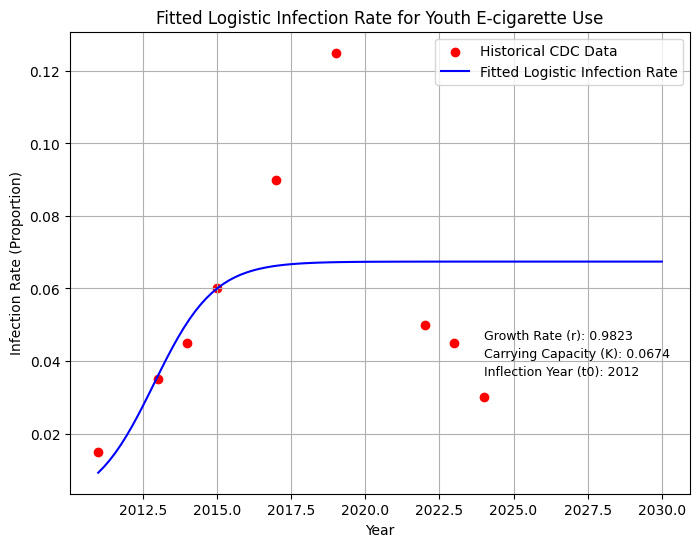

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Historical data points for youth e-cigarette use and estimated infection rate
#years = np.array([2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024])
#infection_rates = np.array([0.015, 0.025, 0.035, 0.045, 0.06, 0.07, 0.09, 0.10, 0.125, 0.10, 0.065, 0.05, 0.045, 0.03])

years = np.array([2011, 2013, 2014, 2015, 2017, 2019, 2022, 2023, 2024])
infection_rates = np.array([0.015, 0.035, 0.045, 0.06, 0.09, 0.125, 0.05, 0.045, 0.03])


# Define the logistic function
def logistic_function(t, K, r, t0):
    return K / (1 + np.exp(-r * (t - t0)))

# Initial guesses and bounds for the logistic curve fitting
initial_guesses = [0.15, 0.1, 2015]  # Initial guesses for K, r, t0
bounds = (0, [1.0, 1.0, 2030])  # Bounds for K, r, t0

# Fit the logistic model to the historical data
params, cov = curve_fit(logistic_function, years, infection_rates, p0=initial_guesses, bounds=bounds)

# Extract the fitted parameters
K_fitted, r_fitted, t0_fitted = params

# Define the logistic infection rate function using the fitted parameters for use in DDE-SIR models
def beta_realistic(t):
    """ Logistic infection rate function for use in DDE-SIR based on fitted youth e-cigarette use data. """
    year = 2011 + t / 12  # Convert time in months to years since 2011
    return logistic_function(year, K_fitted, r_fitted, t0_fitted)

# Test and plot the function
test_years = np.linspace(2011, 2030, 100)
predicted_infection_rates = beta_realistic((test_years - 2011) * 12)  # Convert years to months since 2011

plt.figure(figsize=(8, 6))
plt.scatter(years, infection_rates, color='red', label="Historical CDC Data")
plt.plot(test_years, predicted_infection_rates, label="Fitted Logistic Infection Rate", color='blue')
plt.title("Fitted Logistic Infection Rate for Youth E-cigarette Use")
plt.xlabel("Year")
plt.ylabel("Infection Rate (Proportion)")

# Annotations for fitted parameters
plt.text(2024, 0.046, f'Growth Rate (r): {r_fitted:.4f}', fontsize=9, bbox=dict(facecolor='white', alpha=0.0))
plt.text(2024, 0.041, f'Carrying Capacity (K): {K_fitted:.4f}', fontsize=9, bbox=dict(facecolor='white', alpha=0.0))
plt.text(2024, 0.036, f'Inflection Year (t0): {int(t0_fitted)}', fontsize=9, bbox=dict(facecolor='white', alpha=0.0))

plt.legend()
plt.grid(True)
plt.show()


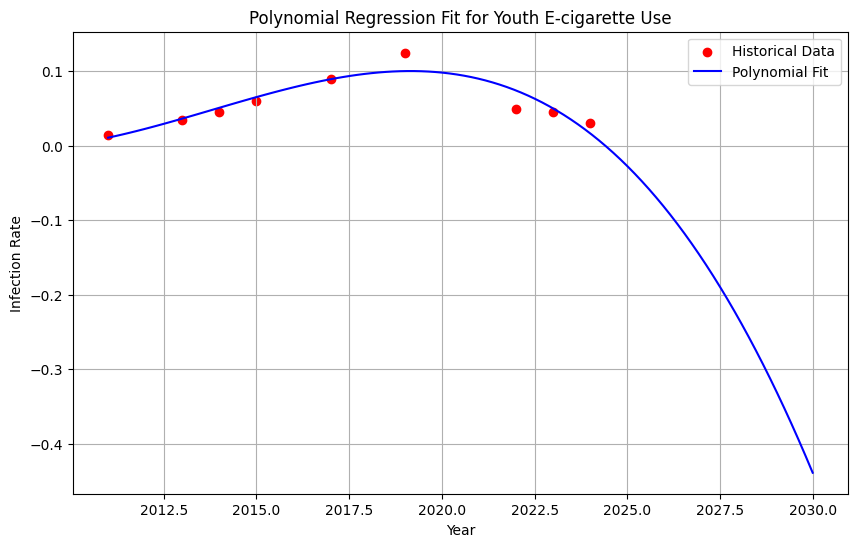

Mean Squared Error: 0.00016528934992482414


In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error

# Data
years = np.array([2011, 2013, 2014, 2015, 2017, 2019, 2022, 2023, 2024])
infection_rates = np.array([0.015, 0.035, 0.045, 0.06, 0.09, 0.125, 0.05, 0.045, 0.03])

# Transform data
X = years.reshape(-1, 1)
y = infection_rates

# Create a polynomial regression model
degree = 3
poly_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())

# Fit the model
poly_model.fit(X, y)

# Predict over the same range
X_test = np.linspace(2011, 2030, 100).reshape(-1, 1)
y_pred = poly_model.predict(X_test)

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(years, infection_rates, color='red', label="Historical Data")
plt.plot(X_test, y_pred, label="Polynomial Fit", color='blue')
plt.title("Polynomial Regression Fit for Youth E-cigarette Use")
plt.xlabel("Year")
plt.ylabel("Infection Rate")
plt.legend()
plt.grid(True)
plt.show()

# Calculate the mean squared error
mse = mean_squared_error(y, poly_model.predict(X))
print("Mean Squared Error:", mse)


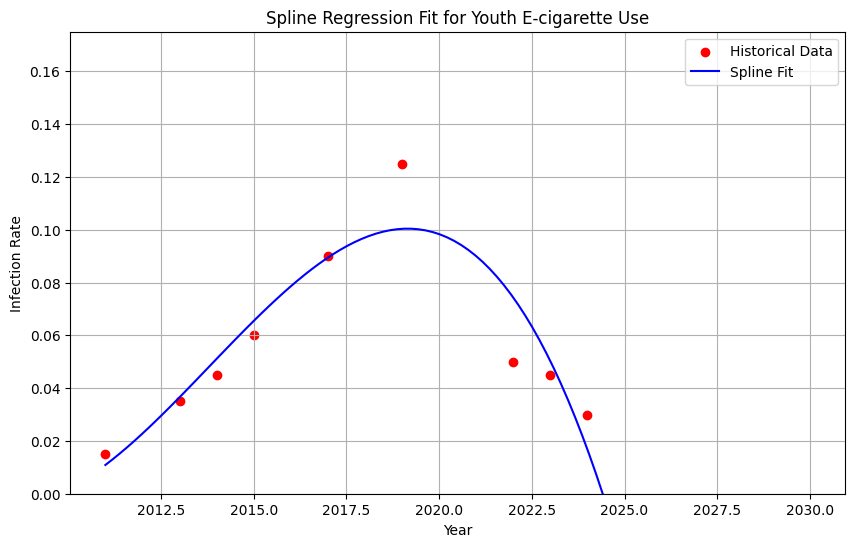

In [21]:
from scipy.interpolate import UnivariateSpline

# Fit a spline model
spline_model = UnivariateSpline(years, infection_rates, s=0.002)  # s is a smoothing factor

# Predict over the same range and beyond
X_test = np.linspace(2011, 2030, 100)
y_spline_pred = spline_model(X_test)

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(years, infection_rates, color='red', label="Historical Data")
plt.plot(X_test, y_spline_pred, label="Spline Fit", color='blue')
plt.title("Spline Regression Fit for Youth E-cigarette Use")
plt.xlabel("Year")
plt.ylabel("Infection Rate")
plt.ylim(0, max(infection_rates) + 0.05)  # Restrict y-axis to non-negative values
plt.legend()
plt.grid(True)
plt.show()


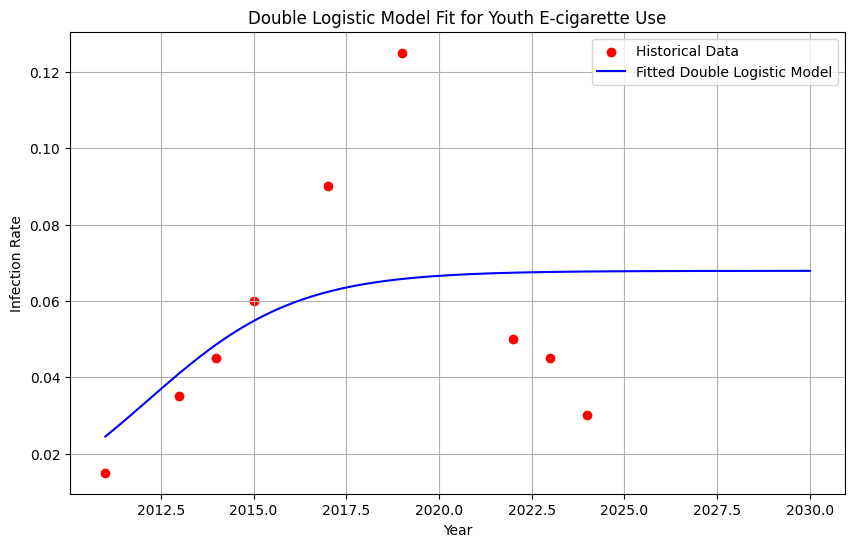

Fitted Parameters for Double Logistic Model:
First Phase - Carrying Capacity (K1): 0.0679, Growth Rate (r1): 0.5000, Inflection Year (t01): 2012
Second Phase - Carrying Capacity (K2): 0.0000, Growth Rate (r2): 0.0000, Inflection Year (t02): 2029


In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define the double logistic function
def double_logistic_function(t, K1, r1, t01, K2, r2, t02):
    """
    Double logistic function to model two phases of growth or decline.
    Args:
        t: Time (years).
        K1, r1, t01: Parameters for the first logistic growth phase.
        K2, r2, t02: Parameters for the second logistic growth phase.
    Returns:
        Combined infection rate at time t from two logistic components.
    """
    logistic1 = K1 / (1 + np.exp(-r1 * (t - t01)))
    logistic2 = K2 / (1 + np.exp(-r2 * (t - t02)))
    return logistic1 + logistic2

# Historical data points for youth e-cigarette use
years = np.array([2011, 2013, 2014, 2015, 2017, 2019, 2022, 2023, 2024])
infection_rates = np.array([0.015, 0.035, 0.045, 0.06, 0.09, 0.125, 0.05, 0.045, 0.03])

# Initial guesses for parameters of the double logistic function
initial_guesses = [0.12, 0.1, 2015, 0.12, 0.1, 2020]  # K1, r1, t01 for first and K2, r2, t02 for second
bounds = ([0, 0, 2010, 0, 0, 2015], [0.15, 0.5, 2025, 0.15, 0.5, 2030])  # Reasonable bounds for the parameters

# Fit the double logistic model to the data
params, _ = curve_fit(double_logistic_function, years, infection_rates, p0=initial_guesses, bounds=bounds)

# Extract the fitted parameters
K1_fitted, r1_fitted, t01_fitted, K2_fitted, r2_fitted, t02_fitted = params

# Generate predictions using the fitted double logistic function
test_years = np.linspace(2011, 2030, 200)
predicted_infection_rates = double_logistic_function(test_years, K1_fitted, r1_fitted, t01_fitted, K2_fitted, r2_fitted, t02_fitted)

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(years, infection_rates, color='red', label="Historical Data")
plt.plot(test_years, predicted_infection_rates, label="Fitted Double Logistic Model", color='blue')
plt.title("Double Logistic Model Fit for Youth E-cigarette Use")
plt.xlabel("Year")
plt.ylabel("Infection Rate")
plt.legend()
plt.grid(True)
plt.show()

# Print the fitted parameters
print("Fitted Parameters for Double Logistic Model:")
print(f"First Phase - Carrying Capacity (K1): {K1_fitted:.4f}, Growth Rate (r1): {r1_fitted:.4f}, Inflection Year (t01): {int(t01_fitted)}")
print(f"Second Phase - Carrying Capacity (K2): {K2_fitted:.4f}, Growth Rate (r2): {r2_fitted:.4f}, Inflection Year (t02): {int(t02_fitted)}")


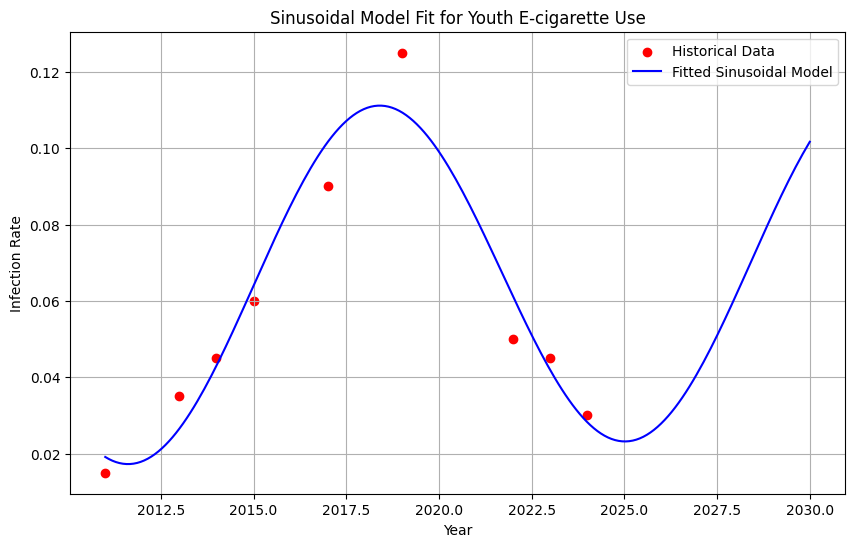

Fitted Parameters for Sinusoidal Model:
Amplitude (A): 0.0454
Frequency (ω): 0.4689
Phase (φ): 110.8141
Linear Slope (m): 0.0004
Intercept (b): -0.8277


In [23]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define a sinusoidal function combined with a linear trend to model the data
def sinusoidal_model(t, A, omega, phi, m, b):
    """
    Combined sinusoidal and linear function.
    Args:
        t: Time (years).
        A: Amplitude of the sinusoid.
        omega: Angular frequency of the sinusoid.
        phi: Phase shift of the sinusoid.
        m: Slope of the linear trend.
        b: Intercept of the linear trend.
    Returns:
        Modeled infection rate at time t.
    """
    return A * np.sin(omega * t + phi) + m * t + b

# Historical data points for youth e-cigarette use
years = np.array([2011, 2013, 2014, 2015, 2017, 2019, 2022, 2023, 2024])
infection_rates = np.array([0.015, 0.035, 0.045, 0.06, 0.09, 0.125, 0.05, 0.045, 0.03])

# Initial guesses for sinusoidal model parameters
initial_guesses = [0.05, 2 * np.pi / 12, 0, 0.001, 0]  # Amplitude, frequency, phase, slope, intercept

# Fit the sinusoidal model to the data
params, _ = curve_fit(sinusoidal_model, years, infection_rates, p0=initial_guesses)

# Extract the parameters
A_fitted, omega_fitted, phi_fitted, m_fitted, b_fitted = params

# Generate predictions using the fitted sinusoidal model
test_years = np.linspace(2011, 2030, 200)
predicted_infection_rates = sinusoidal_model(test_years, A_fitted, omega_fitted, phi_fitted, m_fitted, b_fitted)

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(years, infection_rates, color='red', label="Historical Data")
plt.plot(test_years, predicted_infection_rates, label="Fitted Sinusoidal Model", color='blue')
plt.title("Sinusoidal Model Fit for Youth E-cigarette Use")
plt.xlabel("Year")
plt.ylabel("Infection Rate")
plt.legend()
plt.grid(True)
plt.show()

# Print the fitted parameters
print("Fitted Parameters for Sinusoidal Model:")
print(f"Amplitude (A): {A_fitted:.4f}")
print(f"Frequency (ω): {omega_fitted:.4f}")
print(f"Phase (φ): {phi_fitted:.4f}")
print(f"Linear Slope (m): {m_fitted:.4f}")
print(f"Intercept (b): {b_fitted:.4f}")


In [25]:
# Define the beta_realistic function with the fitted sinusoidal model parameters
def beta_realistic(t):
    """
    Computes the realistic beta (infection rate) over time using a sinusoidal model.
    Args:
        t: Time in months since the start of the data collection (2011).
    Returns:
        Infection rate at time t based on the sinusoidal model.
    """
    # Convert months into years since 2011 for the model
    years = 2011 + t / 12
    # Using the fitted sinusoidal parameters to calculate the infection rate
    return A_fitted * np.sin(omega_fitted * years + phi_fitted) + m_fitted * years + b_fitted

# Example usage: Calculate and print beta_realistic for January 2025
t_example = (2022 - 2011) * 12  # months since 2011
beta_jan_2025 = beta_realistic(t_example)
print(f"The estimated infection rate in January 2022 is: {beta_jan_2025:.4f}")

t_example = (2023 - 2011) * 12  # months since 2011
beta_jan_2025 = beta_realistic(t_example)
print(f"The estimated infection rate in January 2023 is: {beta_jan_2025:.4f}")

t_example = (2024 - 2011) * 12  # months since 2011
beta_jan_2025 = beta_realistic(t_example)
print(f"The estimated infection rate in January 2024 is: {beta_jan_2025:.4f}")

t_example = (2025 - 2011) * 12  # months since 2011
beta_jan_2025 = beta_realistic(t_example)
print(f"The estimated infection rate in January 2025 is: {beta_jan_2025:.4f}")

t_example = (2026 - 2011) * 12  # months since 2011
beta_jan_2025 = beta_realistic(t_example)
print(f"The estimated infection rate in January 2026 is: {beta_jan_2025:.4f}")

t_example = (2026 - 2011) * 12  # months since 2011
beta_jan_2025 = beta_realistic(t_example)
print(f"The estimated infection rate in January 2027 is: {beta_jan_2025:.4f}")

t_example = (2028 - 2011) * 12  # months since 2011
beta_jan_2025 = beta_realistic(t_example)
print(f"The estimated infection rate in January 2028 is: {beta_jan_2025:.4f}")

The estimated infection rate in January 2022 is: 0.0611
The estimated infection rate in January 2023 is: 0.0419
The estimated infection rate in January 2024 is: 0.0282
The estimated infection rate in January 2025 is: 0.0232
The estimated infection rate in January 2026 is: 0.0280
The estimated infection rate in January 2027 is: 0.0280
The estimated infection rate in January 2028 is: 0.0613
